# Not Scaled Data

In [33]:
import pandas as pd
xls = pd.ExcelFile("Фрустрация.xlsx")
data = pd.read_excel(xls, xls.sheet_names)    

In [34]:
keys = [' E', ' E1', ' e_', ' M', ' M1', ' m_', ' I', ' I1', ' i_']

keys1 = [[' E', ' E1', ' e_'],
         [' M', ' M1', ' m_'],
         [' I', ' I1', ' i_']]

keys2 = [[' E', ' M', ' I'],
        [' E1', ' M1', ' I1'],
        [' e_', ' m_', ' i_']]
def get_y(keys, data, init_keys = keys):
    y = []
    for ind, i in enumerate(init_keys):
        for ind1, j in enumerate(keys):
            if i in j:
                y.append(ind1 * np.ones(len(data[i])))
    return np.hstack(y)

In [35]:
data[keys[0]].columns

Index(['Unnamed: 0', 'Число восклицательных знаков',
       'Число вопросительных знаков', 'Число слов', 'Число символов',
       'Число уникальных слов', 'Число клауз', 'Число предложений',
       'Число знаков препинания',
       'Средняя длина предложения (в количестве слов)',
       ...
       'Синтакс. связь: nummod', 'Синтакс. связь: nummod:gov',
       'Синтакс. связь: obj', 'Синтакс. связь: obl', 'Синтакс. связь: orphan',
       'Синтакс. связь: parataxis', 'Синтакс. связь: punct',
       'Синтакс. связь: root', 'Синтакс. связь: xcomp',
       'Синтакс. связь: compound'],
      dtype='object', length=243)

In [36]:
import numpy as np
from sklearn.preprocessing import scale
X = np.vstack([data[i].values for i in keys])
X = X[:, 1:]
y1 = get_y(keys1, data)
y2 = get_y(keys2, data)

In [37]:
print("Число слов", X[:, 2].mean())

Число слов 36.49063670411985


In [38]:
print("Число предложений", X[:, 6].mean())

Число предложений 3.4569288389513106


In [39]:
print("Число символов", X[:, 3].mean())

Число символов 188.49812734082397


In [40]:
X = scale(X)

## The First Union

### 1. Not binarized data

<IPython.core.display.Javascript object>


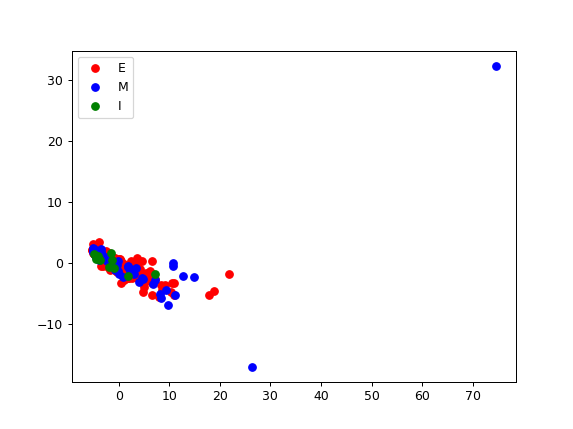

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.4141005541940732

In [43]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


0.3781505191431662

In [44]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 252)


0.3534074310172268

In [45]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3097021698090761

In [46]:
from sklearn.svm import SVC

X, y = shuffle(X, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change f

0.2287162220495554

### 2. Binarized data

<IPython.core.display.Javascript object>


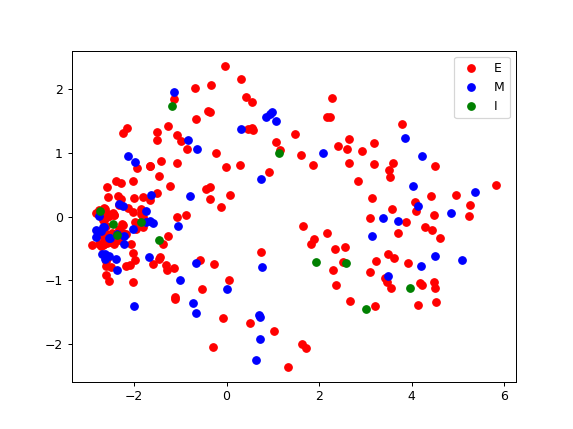

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
X_bin = np.where(X <= 0, 0, 1)

pca = PCA(2).fit(X_bin)
X_ = pca.transform(X_bin)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X_bin, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.3540344440149115

In [48]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3293581915713558

In [49]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 185)


/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.29947333347890864

In [50]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X_bin, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.27632376291983046

In [51]:
from sklearn.svm import SVC

X_, y = shuffle(X_bin, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-d

0.22812124880842277

## The Second Union

### 1. Not binarized data

<IPython.core.display.Javascript object>


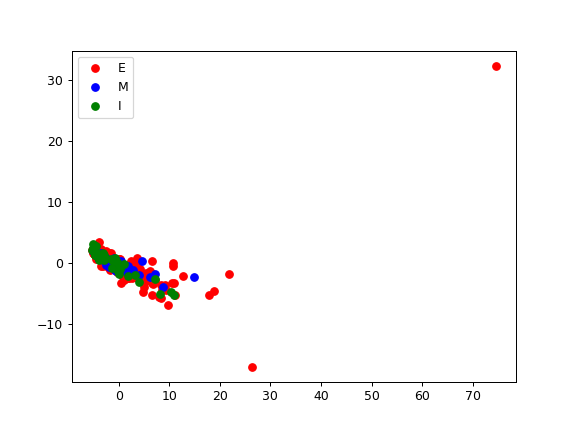

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y2[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y2)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.37172498114527097

In [57]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y2)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


0.35961654745428434

In [58]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y2)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 252)


0.31414624521535917

In [59]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y2)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.274598681267945

In [60]:
from sklearn.svm import SVC

X_, y = shuffle(X, y2)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change f

0.18171189411325364

### 2. Binarized data

<IPython.core.display.Javascript object>


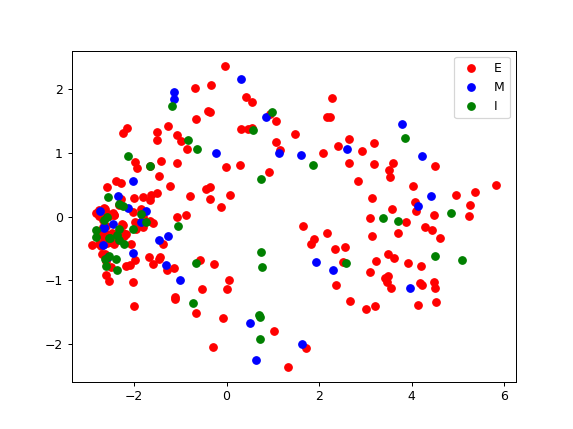

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
X_bin = np.where(X <= 0, 0, 1)

pca = PCA(2).fit(X_bin)
X_ = pca.transform(X_bin)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y2[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X_bin, y2)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.3394927378417097

In [64]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y2)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 156)


0.2518327111727277

In [65]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y2)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 185)


0.3021563569120239

In [66]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X_bin, y2)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.274598681267945

In [67]:
from sklearn.svm import SVC

X_, y = shuffle(X_bin, y2)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-d

0.2101009058594198

# Scaled Data

In [68]:
import pandas as pd
xls = pd.ExcelFile("Фрустрация.xlsx")
data = pd.read_excel(xls, xls.sheet_names)    

In [69]:
keys = [' E', ' E1', ' e_', ' M', ' M1', ' m_', ' I', ' I1', ' i_']

keys1 = [[' E', ' E1', ' e_'],
         [' M', ' M1', ' m_'],
         [' I', ' I1', ' i_']]

keys2 = [[' E', ' M', ' I'],
        [' E1', ' M1', ' I1'],
        [' e_', ' m_', ' i_']]
def get_y(keys, data, init_keys = keys):
    y = []
    for ind, i in enumerate(init_keys):
        for ind1, j in enumerate(keys):
            if i in j:
                y.append(ind1 * np.ones(len(data[i])))
    return np.hstack(y)

In [70]:
data[keys[0]].columns

Index(['Unnamed: 0', 'Число восклицательных знаков',
       'Число вопросительных знаков', 'Число слов', 'Число символов',
       'Число уникальных слов', 'Число клауз', 'Число предложений',
       'Число знаков препинания',
       'Средняя длина предложения (в количестве слов)',
       ...
       'Синтакс. связь: nummod', 'Синтакс. связь: nummod:gov',
       'Синтакс. связь: obj', 'Синтакс. связь: obl', 'Синтакс. связь: orphan',
       'Синтакс. связь: parataxis', 'Синтакс. связь: punct',
       'Синтакс. связь: root', 'Синтакс. связь: xcomp',
       'Синтакс. связь: compound'],
      dtype='object', length=243)

In [88]:
import numpy as np
from sklearn.preprocessing import scale
X = np.vstack([data[i].values for i in keys])
X = X[:, 1:]
X1 = X/X[:, 2][:, None]
X = np.hstack([X, X1])
y1 = get_y(keys1, data)
y2 = get_y(keys2, data)

In [89]:
print("Число слов", X[:, 2].mean())

Число слов 36.49063670411985


In [90]:
print("Число предложений", X[:, 6].mean())

Число предложений 3.4569288389513106


In [91]:
print("Число символов", X[:, 3].mean())

Число символов 188.49812734082397


In [92]:
X = scale(X)

## The First Union

### 1. Not binarized data

<IPython.core.display.Javascript object>


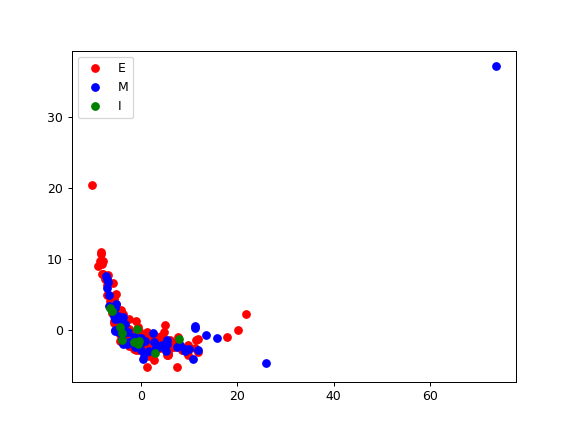

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 484)


0.31209603014484183

In [101]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 223)


0.32518861091000395

In [105]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 266)


0.31600047240790413

In [106]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3208577019954695

In [107]:
from sklearn.svm import SVC

X, y = shuffle(X, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change f

0.20264086615358054

### 2. Binarized data

<IPython.core.display.Javascript object>


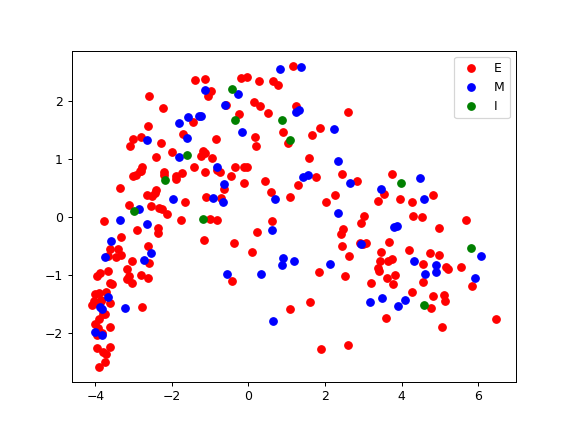

In [108]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
X_bin = np.where(X <= 0, 0, 1)

pca = PCA(2).fit(X_bin)
X_ = pca.transform(X_bin)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y1[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X_bin, y1)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 484)


0.3390133518906322

In [110]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y1)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 203)


0.31300388529070694

In [111]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y1)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 252)


0.3025160025160025

In [112]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X_bin, y1)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2786266333857556

In [113]:
from sklearn.svm import SVC

X_, y = shuffle(X_bin, y1)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-d

0.22812124880842277

## The Second Union

### 1. Not binarized data

<IPython.core.display.Javascript object>


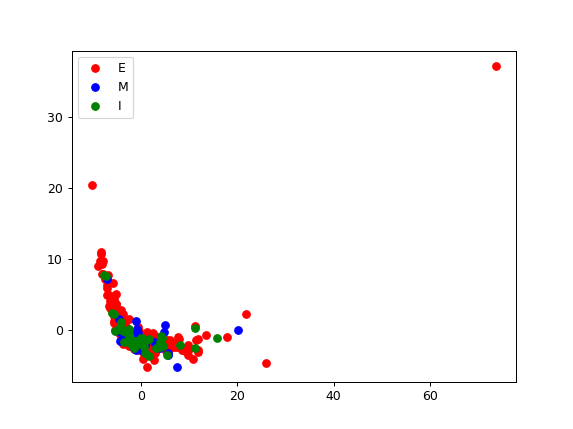

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
pca = PCA(2).fit(X)
X_ = pca.transform(X)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y2[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X, y2)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 484)


0.3552895136695342

In [119]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y2)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 223)


0.3329352028498311

In [120]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X, y2)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 266)


0.29810044613336034

In [121]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X, y2)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2745854140549426

In [122]:
from sklearn.svm import SVC

X_, y = shuffle(X, y2)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-d

0.2120791786500175

### 2. Binarized data

<IPython.core.display.Javascript object>


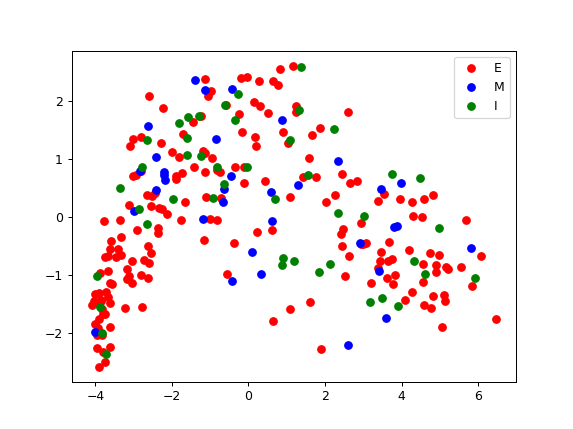

In [124]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib notebook
X_bin = np.where(X <= 0, 0, 1)

pca = PCA(2).fit(X_bin)
X_ = pca.transform(X_bin)
colours = ['r', 'b', 'g']
for ind, i in enumerate(keys1):
    X__ = np.array([i for ind1,i in enumerate(X_) if int(y2[ind1]) == ind])
    plt.plot(X__[:, 0], X__[:, 1], colours[ind] + 'o')
plt.legend(['E', 'M', 'I'])

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

X_, y = shuffle(X_bin, y2)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 242)


0.3394927378417097

In [125]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y2)
X_ = PCA(1 - 1e-3).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 203)


0.35895156186829263

In [126]:
from sklearn.linear_model import LogisticRegression

X_, y = shuffle(X_bin, y2)
X_ = np.hstack([X_, X_ * np.sqrt(np.abs(X_))])
X_ = PCA(1 - 1e-6).fit(X_).transform(X_)
print(X_.shape)
model = LogisticRegression(penalty = "l1", solver = "liblinear", class_weight = "balanced", multi_class = "ovr")
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

(267, 252)


0.4017931515546193

In [127]:
from sklearn.ensemble import RandomForestClassifier

X_, y = shuffle(X_bin, y2)
model = RandomForestClassifier(100)
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2754603829836028

In [128]:
from sklearn.svm import SVC

X_, y = shuffle(X_bin, y2)
model = SVC(C = 10, kernel = 'poly', degree = 5, class_weight = 'balanced')
cross_val_score(model, X_, y, cv = 3, scoring = "f1_macro").mean()

/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/elias/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-d

0.2101009058594198